In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
col_names = iris.feature_names

In [6]:
col_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [7]:
df.shape

(150, 4)

<Axes: title={'center': 'scatter plot'}, xlabel='sepal length (cm)', ylabel='petal length (cm)'>

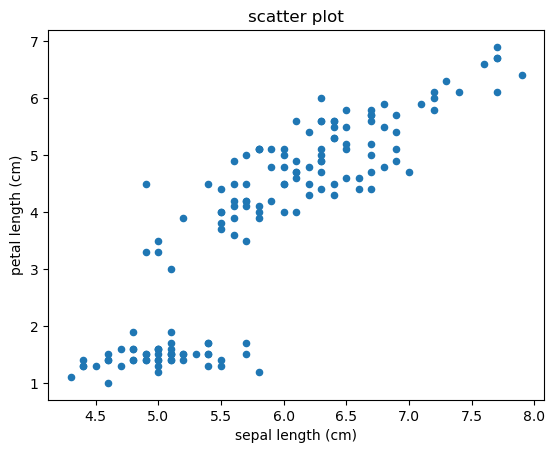

In [10]:
df.plot.scatter(x = "sepal length (cm)", y = 'petal length (cm)', title = 'scatter plot')

In [11]:
df.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# preprocessing the data

In [13]:
y = df['petal width (cm)'].values.reshape(-1,1)
x = df['petal length (cm)'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2)

In [15]:
print(x_train)
print(y_train)

[[1.5]
 [5.5]
 [1.4]
 [1.3]
 [1.2]
 [1.4]
 [1.6]
 [4.5]
 [6.7]
 [1.7]
 [5.1]
 [3.6]
 [1.5]
 [1.6]
 [5.6]
 [4. ]
 [4.7]
 [1.3]
 [4.7]
 [5.7]
 [4.5]
 [5.7]
 [5.4]
 [4.2]
 [5.1]
 [4.5]
 [1.5]
 [1.3]
 [4.4]
 [5.6]]
[[0.2]
 [1.8]
 [0.1]
 [0.2]
 [0.2]
 [0.2]
 [0.2]
 [1.5]
 [2.2]
 [0.4]
 [1.9]
 [1.3]
 [0.1]
 [0.6]
 [2.2]
 [1.2]
 [1.6]
 [0.2]
 [1.2]
 [2.5]
 [1.5]
 [2.1]
 [2.3]
 [1.3]
 [1.8]
 [1.7]
 [0.4]
 [0.4]
 [1.4]
 [1.4]]


# train the model

linear regression


In [16]:
from sklearn.linear_model import LinearRegression

In [18]:
reg = LinearRegression()

In [33]:
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
intercept = reg.intercept_
intercept

array([-0.32572311])

In [43]:
slop = reg.coef_
coefficient

array([[0.41078365]])

In [44]:
# prediction
reg.predict([[7.5]])

array([[2.75515423]])

In [46]:
# so we can pass the calculation 
def cal(intercept, slope, value):
    return slope*value+intercept

In [47]:
result = cal(intercept,slop,7.5)

In [48]:
result

array([[2.75515423]])

In [49]:
y_pred = reg.predict(x_test)

In [53]:
df_pred = pd.DataFrame({'Actual':y_test.squeeze(), 'predicted':y_pred.squeeze()})

In [54]:
df_pred

,Actual,predicted
0,0.2,0.085061
1,0.3,0.208296
2,1.8,1.646038
3,1.3,1.317411
4,1.3,1.317411
...,...,...
115,1.9,1.769273
116,0.2,0.249374
117,1.9,2.180057
118,1.8,1.933587


In [57]:
# evaluating the model
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [58]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
smse = np.sqrt(mse)

In [59]:
mae

0.16213753631700012

In [60]:
mse

0.042002334916841376

In [61]:
smse

0.2049447118538104